In [1]:
# Owner:      Chilin Tang, Data & Analytics, Digitas Singapore, chilin.tang@digitas.com

# Solution:   Multiple linear regression for marketing mix modeling, predicting dependent variable (y) from one/more dependent variables (x) through mix modeling such as MMM

# Use case:   Marketing Mix Modeling of Abbott Singapore eCommerce sales (from CRM) against digital media spends from 1 July to 30 Oct 2021

# Date of publication:  8 Apr 2022

# Data requirements:  
#                     1) Relationship between dependent variable and independent variables is (approximately) linear
#                     2) Expected mean error of the regression model is zero
#                     3) Residuals are uncorrelated with each others (i.e. no multicollinearity)
#                     4) Errors (residuals) are normally distributed and have 0 population mean
#                     5) Residuals do not vary with x (i.e. constant variance, no heteroskedacticity)


In [2]:
#  pip install scipy numpy pandas statsmodels pingouin

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
matplotlib.style.use('ggplot')
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import pingouin as pg
# from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Fetch a single <10MB file using the raw GitHub URL.
!curl --remote-name \
-H 'Accept: application/vnd.github.v3.raw' \
--location https://raw.githubusercontent.com/Digitas-Singapore/Data-Analytics-Team/Chilin-Tang/AbbottSalesAttribution.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4491  100  4491    0     0  24675      0 --:--:-- --:--:-- --:--:-- 24540


In [5]:
# Load Marketing Mix data set
mmm = pd.read_csv("AbbottSalesAttribution.csv") #reads text data into data frame
# Open and read in data on Abbott daily eCommerce sales with corresponding digital media spends.csv

In [6]:
#  Views the MMM dataset with marketing spreads and spends
mmm

,Date,Sales,Display Spends,Video Spends,Social Spends
0,1-Jul,2635.77,1.90,0.00,586.92
1,2-Jul,1486.10,12.04,0.00,577.07
2,3-Jul,0.00,74.75,0.00,558.67
3,4-Jul,0.00,158.36,0.00,529.50
4,5-Jul,3530.78,198.26,0.00,545.41
...,...,...,...,...,...
118,27-Oct,2945.05,477.65,188.72,1360.52
119,28-Oct,2361.87,508.41,188.90,1369.07
120,29-Oct,2371.83,537.44,189.83,1343.06
121,30-Oct,0.00,551.35,190.30,976.60


In [ ]:
#  Structure of Abbott MMM dataset
#	 Date	                  Daily modeling from 1 Jul to 30 Nov 2021
#  Sales	                Daily collated eCommerce sales figures from Abbott CRM
#  Display Spends         Daily investment on display media
#  Video Spends           Daily investment on video media
#  Social Spends          Daily investment on social media


In [7]:
# Descriptive statistics for Exploratory Data Analysis
mmm.describe()

,Sales,Display Spends,Video Spends,Social Spends
count,123.000000,123.000000,123.000000,123.000000
mean,1995.290000,758.285122,510.796585,705.351870
std,1442.764444,452.793296,351.227018,221.110714
min,0.000000,1.900000,0.000000,249.910000
25%,100.380000,451.185000,189.160000,559.720000
50%,2377.360000,667.910000,522.950000,705.220000
75%,2981.395000,1023.495000,850.825000,823.450000
max,5005.520000,2640.830000,1110.640000,1369.070000


In [8]:
# =================================== Developing the Multi Linear Regression Model ================================

In [11]:
mmm.iloc[:,1:5]
# Taking the dataset without dates   

,Sales,Display Spends,Video Spends,Social Spends
0,2635.77,1.90,0.00,586.92
1,1486.10,12.04,0.00,577.07
2,0.00,74.75,0.00,558.67
3,0.00,158.36,0.00,529.50
4,3530.78,198.26,0.00,545.41
...,...,...,...,...
118,2945.05,477.65,188.72,1360.52
119,2361.87,508.41,188.90,1369.07
120,2371.83,537.44,189.83,1343.06
121,0.00,551.35,190.30,976.60


In [12]:
# creates a model where Sales (Y axis) is attributed from Display, Video and Social Channels (X axis)
X=mmm.iloc[:,2:5]
Y=mmm.Sales

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
print(est.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.025     
Dependent Variable:  Sales            AIC:                2139.3670 
Date:                2022-04-10 12:47 BIC:                2150.6157 
No. Observations:    123              Log-Likelihood:     -1065.7   
Df Model:            3                F-statistic:        2.040     
Df Residuals:        119              Prob (F-statistic): 0.112     
R-squared:           0.049            Scale:              2.0296e+06
--------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const          3010.1998 476.6302  6.3156 0.0000 2066.4244 3953.9753
Display Spends    0.2332   0.3466  0.6727 0.5024   -0.4532    0.9195
Video Spends     -0.4661   0.4444 -1.0488 0.2964   -1.3459    0.4138
Social Spends    -1.3520   0.5878 -2.3000 0.0232   -2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
#  This is how linear regression table can be interpreted for attribution.  Statistically significant variables are: 
#  eCommerce CRM Sales = 3010 (residual) + [for every $ in CRM sales] 0.2332∗Display Spend - 0.4661∗Video Spend - 1.352*Social Spend

In [14]:
# =================== Evaluating goodness of fit and error mitigation (Multicollinearity and Variance Inflation Factor (VIF) ====================

In [16]:
#  When there is a high intercorrelation between two or more independent variables in a multiple regression model, it is called multicollinearity.
#  Multicollinearity can make the model unstable and the statistically significant feature may be labelled as statistically insignificant (large p-value).
#  Variance Inflation Factor (VIF) is measuring the magnitude of multicollinearity. VIF is given by  1/(1−𝑅²) . 
#  Its number indicates by how much larger the standard error is increased, in presence of multicollinearity. 
#  VIF needs to be at threshold of less than 4 to conclude minimal impact of multicollinearity.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif_factor=pd.DataFrame({'VIF': vif},index=X.columns)
vif_factor

,VIF
Display Spends,5.491247
Video Spends,4.359827
Social Spends,3.503573


In [18]:
#  Checking the correlation matrix

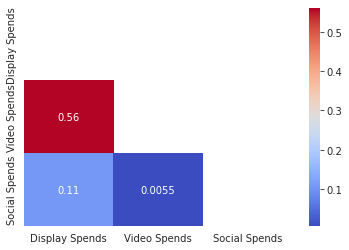

In [19]:
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(X.corr()))
corr = sns.heatmap(X.corr(), annot=True, cmap='coolwarm', mask=mask)

In [20]:
#  Feature selection:  The correlation matrix above shown that there is low correlation ( <0.70 ) between features:
#  if correlation is >0.70, we can use VIF factor to mitigate correlation risks, apply Linear Regression only to variables with lower correlations

In [21]:
vif_factor['p-values']=est.pvalues[1:]
vif_factor

,VIF,p-values
Display Spends,5.491247,0.502441
Video Spends,4.359827,0.296375
Social Spends,3.503573,0.023191


In [22]:
#  Measured between VIF and p-values, Social spends is least impacted by multicollinearity.


In [23]:
#  This results in a better model, with Adjusted R-squared being higher at 83.4% (compared to 80.7%). 
#  Multicollinearity is already handled and all the variables are statistically significant (p-value < 0.05).

In [ ]:
#  Other ways to handling multicollinearity are:

#  1.  Use centred variables for example use  𝑋𝑖−𝑋 mean  instead of  𝑋𝑖 , or any other transformation
#  2.  Apply Principal Component Analysis (PCA) to reduce features to a smaller set of uncorrelated (orthogonal) components.

In [ ]:
# =================================== Residual Analysis (to see if normally distributed) ============================================